In [1]:
import sys

In [2]:
sys.path.append('..')

In [3]:
from cipher_placeholder import original_message

In [4]:
from string import ascii_lowercase

In [5]:
from random import sample

In [6]:
from copy import deepcopy

In [7]:
class CharMapper(object):
    
    def __init__(self, char_map=None):
        if char_map is None:
            self._char_map = {}
            for k, v in zip(sample(ascii_lowercase, 26), ascii_lowercase):
                self._char_map[k] = v
        else:
            self._char_map = deepcopy(char_map)
        self._char_map['.'] = '.'
        self._char_map[','] = ','
    
    def __call__(self, msg):
        cipher = ''.join(
            self._char_map.get(c, ' ')
            for c in msg.strip().lower()
        )
        return cipher
    
    def __deepcopy__(self, memo):
        cls = type(self)
        return cls(self._char_map)
    
    @property
    def char_map(self):
        return self._char_map
    
    def mutate(self):
        char1, char2 = sample(ascii_lowercase, 2)
        v1 = self._char_map[char1]
        v2 = self._char_map[char2]
        new_char_map = deepcopy(self.char_map)
        new_char_map[char1] = v2
        new_char_map[char2] = v1
        return type(self)(new_char_map)

In [8]:
cipher = CharMapper()

In [9]:
original_message

'I then lounged down the street and found,\nas I expected, that there was a mews in a lane which runs down\nby one wall of the garden. I lent the ostlers a hand in rubbing\ndown their horses, and received in exchange twopence, a glass of\nhalf-and-half, two fills of shag tobacco, and as much information\nas I could desire about Miss Adler, to say nothing of half a dozen\nother people in the neighbourhood in whom I was not in the least\ninterested, but whose biographies I was compelled to listen to.\n'

In [10]:
encrypted_message = cipher(original_message)
encrypted_message

'u pces yftsdeh hfvs pce kpjeep bsh lftsh, bk u enzerpeh, pcbp pceje vbk b gevk us b ybse vcurc jtsk hfvs oi fse vbyy fl pce dbjhes. u yesp pce fkpyejk b cbsh us jtoousd hfvs pceuj cfjkek, bsh jereuaeh us enrcbsde pvfzesre, b dybkk fl cbyl bsh cbyl, pvf luyyk fl kcbd pfobrrf, bsh bk gtrc uslfjgbpufs bk u rftyh hekuje boftp gukk bhyej, pf kbi sfpcusd fl cbyl b hfwes fpcej zefzye us pce seudcoftjcffh us vcfg u vbk sfp us pce yebkp uspejekpeh, otp vcfke oufdjbzcuek u vbk rfgzeyyeh pf yukpes pf.'

In [11]:
import requests
import os

In [12]:
if not os.path.exists('moby_dict.txt'):
    res = requests.get('https://lazyprogrammer.me/course_files/moby_dick.txt')
    with open('moby_dict.txt', 'w', encoding='utf8') as fid:
        fid.write(res.content.decode('utf8'))

In [13]:
with open('moby_dict.txt', 'r') as fid:
    content = fid.read().lower()

In [14]:
from collections import Counter

In [15]:
valid_chars = set(ascii_lowercase)

In [16]:
unigram_cnter = Counter()
bigram_cnter = Counter()
for i in range(len(content)):
    c = content[i]
    if c not in valid_chars:
        continue
    unigram_cnter[c] += 1
    bigram = ''.join(filter(lambda c: c in valid_chars, content[i:i+2]))
    if len(bigram) == 2:
        bigram_cnter[bigram] += 1
total_support = sum(unigram_cnter.values())

In [17]:
from math import log

In [19]:
def compute_likelihood(decrypted_message):
    msg = decrypted_message.replace(' ', '')
    log_likelihood = log((unigram_cnter[msg[0]]+1)/(total_support+26))
    for i in range(0, len(msg)-2):
        cnt_bigram = bigram_cnter[msg[i:i+2]]
        cnt_unigram = unigram_cnter[msg[i]]
        prob = (1 + cnt_bigram) / (cnt_unigram + 26)
        log_likelihood += log(prob)
    return log_likelihood

In [20]:
from itertools import chain

In [21]:
def create_offspring(deciphers, num_offspring):
    return chain(
        *[[decipher.mutate() for _ in range(num_offspring)] for decipher in deciphers],
        deciphers,
    )

In [22]:
num_epoches = 1000

In [23]:
from random import seed

In [33]:
seed(1111)

In [34]:
decipers = [CharMapper() for _ in range(60)]
scores = []
for i in range(1, num_epoches+1):
    if i > 1:
        decipers = create_offspring(decipers, 3)
    pairs = [
        (compute_likelihood(decipher(encrypted_message)), decipher)
        for decipher in decipers
    ]
    pairs = sorted(pairs, key=lambda p: p[0], reverse=True)
    if i % 100 == 0:
        print(pairs[0][0])
    decipers = [p[1] for p in pairs[:15]]
    scores.append(pairs[0][0])

-1253.0798709197043
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023
-1240.6056405427023


In [35]:
import matplotlib.pyplot as plt

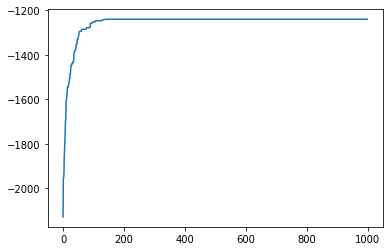

In [36]:
plt.plot(scores)

In [37]:
best_decipher = decipers[0]

In [38]:
encrypted_message

'u pces yftsdeh hfvs pce kpjeep bsh lftsh, bk u enzerpeh, pcbp pceje vbk b gevk us b ybse vcurc jtsk hfvs oi fse vbyy fl pce dbjhes. u yesp pce fkpyejk b cbsh us jtoousd hfvs pceuj cfjkek, bsh jereuaeh us enrcbsde pvfzesre, b dybkk fl cbyl bsh cbyl, pvf luyyk fl kcbd pfobrrf, bsh bk gtrc uslfjgbpufs bk u rftyh hekuje boftp gukk bhyej, pf kbi sfpcusd fl cbyl b hfwes fpcej zefzye us pce seudcoftjcffh us vcfg u vbk sfp us pce yebkp uspejekpeh, otp vcfke oufdjbzcuek u vbk rfgzeyyeh pf yukpes pf.'

In [39]:
best_decipher(encrypted_message)

'i then lounged down the street and yound, as i expected, that there was a mews in a lane which runs down fk one wall oy the garden. i lent the ostlers a hand in ruffing down their horses, and received in exchange twopence, a glass oy haly and haly, two yills oy shag tofacco, and as much inyormation as i could desire afout miss adler, to sak nothing oy haly a doben other people in the neighfourhood in whom i was not in the least interested, fut whose fiographies i was compelled to listen to.'

In [40]:
original_message.lower().replace('\n', ' ').replace('-', ' ').strip()

'i then lounged down the street and found, as i expected, that there was a mews in a lane which runs down by one wall of the garden. i lent the ostlers a hand in rubbing down their horses, and received in exchange twopence, a glass of half and half, two fills of shag tobacco, and as much information as i could desire about miss adler, to say nothing of half a dozen other people in the neighbourhood in whom i was not in the least interested, but whose biographies i was compelled to listen to.'

In [42]:
print(original_message)

I then lounged down the street and found,
as I expected, that there was a mews in a lane which runs down
by one wall of the garden. I lent the ostlers a hand in rubbing
down their horses, and received in exchange twopence, a glass of
half-and-half, two fills of shag tobacco, and as much information
as I could desire about Miss Adler, to say nothing of half a dozen
other people in the neighbourhood in whom I was not in the least
interested, but whose biographies I was compelled to listen to.

